In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


In [2]:
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3, n_redundant=2, 
                           n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0)



In [3]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear')

In [4]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfev = RFECV(estimator=svc, step=1, cv = StratifiedKFold(2), scoring='accuracy')
rfev.fit(X,y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [5]:
print("Optimal number of features: %d" % rfev.n_features_)


Optimal number of features: 3


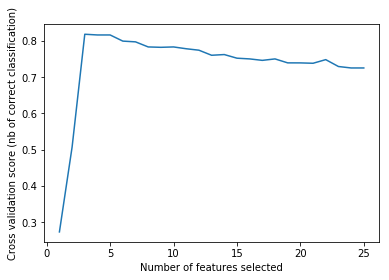

In [6]:
# plot number of features vs cross-validation scores
plt.figure()
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classification)')
plt.plot(range(1, len(rfev.grid_scores_) + 1), rfev.grid_scores_)
plt.show()